In [1]:
import pathlib

import matplotlib
import numpy as np
import pandas as pd


matplotlib.use('Agg', warn=False)

%matplotlib inline

import matplotlib.pyplot as plots

plots.style.use('fivethirtyeight')
plots.rc('font', size=18)
plots.rc('axes', labelsize=20)
plots.rc('legend', fontsize=14)
plots.rc('xtick', labelsize=16)
plots.rc('ytick', labelsize=16)


pd.set_option('display.max_rows', 10)
pd.set_option('display.show_dimensions', False)


PATH_DATA = pathlib.Path.cwd().parent.parent.parent.parent.parent / 'data'

In [2]:
# Read two books, fast (again)!

huck_finn_text = (PATH_DATA / 'huck_finn.txt').read_text()

huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]


little_women_text = (PATH_DATA / 'little_women.txt').read_text()

little_women_chapters = little_women_text.split('CHAPTER ')[1:]

# Another Kind of Character

In some situations, the relationships between quantities allow us to make predictions. This text will explore how to make accurate predictions based on incomplete information and develop methods for combining multiple sources of uncertain information to make decisions.

As an example of visualizing information derived from multiple sources, let us first use the computer to get some information that would be tedious to acquire by hand. In the context of novels, the word "character" has a second meaning: a printed symbol such as a letter or number or punctuation symbol. Here, we ask the computer to count the number of characters and the number of periods in each chapter of both *Huckleberry Finn* and *Little Women*.

In [3]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

def NaturalIndex(sequence, **kwargs):
    """Construct a Pandas Index, starting with 1, and sized for the given sequence."""
    return pd.RangeIndex(1, len(sequence) + 1, **kwargs)


chars_periods_huck_finn = pd.DataFrame(
    {
        'Chapter Length': [len(chapter) for chapter in huck_finn_chapters],
        'Number of Periods': [chapter.count('.') for chapter in huck_finn_chapters],
    },
    NaturalIndex(huck_finn_chapters, name='Huck Finn Chapter'),
)

chars_periods_little_women = pd.DataFrame(
    {
        'Chapter Length': [len(chapter) for chapter in little_women_chapters],
        'Number of Periods': [chapter.count('.') for chapter in little_women_chapters],
    },
    NaturalIndex(little_women_chapters, name='Little Women Chapter'),
)

Here are the data for *Huckleberry Finn*. Each row of the table corresponds to one chapter of the novel and displays the number of characters as well as the number of periods in the chapter. Not surprisingly, chapters with fewer characters also tend to have fewer periods, in general: the shorter the chapter, the fewer sentences there tend to be, and vice versa. The relation is not entirely predictable, however, as sentences are of varying lengths and can involve other punctuation such as question marks. 

In [4]:
chars_periods_huck_finn

,Chapter Length,Number of Periods
Huck Finn Chapter,,
1,7088,66
2,12113,117
3,8612,72
4,6892,84
5,8269,91
...,...,...
39,10962,96
40,11632,60
41,13545,77


Here are the corresponding data for *Little Women*.

In [5]:
chars_periods_little_women

,Chapter Length,Number of Periods
Little Women Chapter,,
1,21952,189
2,22384,188
3,20815,231
4,25689,195
5,23657,255
...,...,...
43,33481,305
44,10383,95
45,12646,96


You can see that the chapters of *Little Women* are in general longer than those of *Huckleberry Finn*. Let us see if these two simple variables – the length and number of periods in each chapter – can tell us anything more about the two books. One way to do this is to plot both sets of data on the same axes. 

In the plot below, there is a dot for each chapter in each book. Blue dots correspond to *Huckleberry Finn* and gold dots to *Little Women*. The horizontal axis represents the number of periods and the vertical axis represents the number of characters.

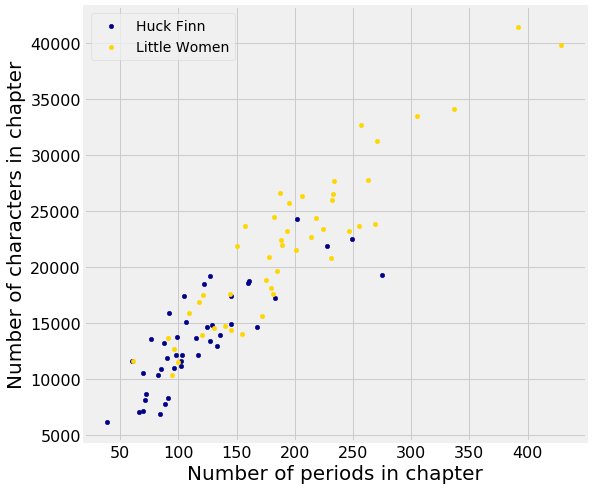

In [6]:
chars_periods_plot = chars_periods_huck_finn.plot.scatter(
    x='Number of Periods',
    y='Chapter Length',
    color='darkblue',
    label='Huck Finn',
    figsize=(8, 8),
)

chars_periods_little_women.plot.scatter(
    x='Number of Periods',
    y='Chapter Length',
    color='gold',
    label='Little Women',
    ax=chars_periods_plot,
)

chars_periods_plot.set_xlabel('Number of periods in chapter')
chars_periods_plot.set_ylabel('Number of characters in chapter');

The plot shows us that many but not all of the chapters of *Little Women* are longer than those of *Huckleberry Finn*, as we had observed by just looking at the numbers. But it also shows us something more. Notice how the blue points are roughly clustered around a straight line, as are the yellow points. Moreover, it looks as though both colors of points might be clustered around the *same* straight line.

Now look at all the chapters that contain about 100 periods. The plot shows that those chapters contain about 10,000 characters to about 15,000 characters, roughly. That's about 100 to 150 characters per period.

Indeed, it appears from looking at the plot that on average both books tend to have somewhere between 100 and 150 characters between periods, as a very rough estimate. Perhaps these two great 19th century novels were signaling something so very familiar to us now: the 140-character limit of Twitter.